In [2]:
import xarray as xr
import numpy as np
import pandas as pd
# import hvplot.xarray
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
# xroms is an augmented xarray to work with ROMS outputs
import xroms
# cmocean colormaps for oceanography. xcmocean for auto choice of colormap
# import cmocean.cm as cmo
# import xcmocean 

In [3]:
url = "https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/files/doppio_avg_20240201_0000_0001.nc"
# url = "https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/runs/Averages_RUN_2024-02-01T00:00:00Z"
ds = xr.open_dataset(url)
# ds.cf.describe()
ds

<xarray.Dataset>
Dimensions:         (tracer: 2, boundary: 4, s_rho: 40, s_w: 41, eta_rho: 106, xi_rho: 242, eta_u: 106, xi_u: 241, eta_v: 105, xi_v: 242, eta_psi: 105, xi_psi: 241, ocean_time: 1)
Coordinates:
  * s_rho           (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w             (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2024-02-01T12:00:00
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/107)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    shuffle         int32 ...
    ...              ...
    salt            (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    shflux          (ocean_time, eta_rho, xi_rho) float64 ...
    ssflux          (ocean_time, eta_rho, xi_rho) float64 ...
    swrad_daily     (ocean_time, eta_rho, xi_rho) float64 ...
    sustr           (ocean_time, eta_u, xi_u) float64 ...
    svstr           (ocean_time, eta_v, xi_v) float64 ...
Attributes: (12/35)
    file:                            doppio_avg_6605_0001.nc
    format:                          netCDF-4/HDF5 file
    Conventions:                     CF-1.4, SGRID-0.3
    type:                            ROMS/TOMS nonlinear model averages file
    title:                           DOPPIO
    var_info:                        ../Data/varinfo1040t_daily.dat
    ...                              ...
    compiler_flags:                  -fp-model precise -heap-arrays -ip -O3 -...
    tiling:                          004x004
    history:                         ROMS/TOMS, Version 3.9, Sunday - Februar...
    ana_file:                        ROMS/Functionals/ana_btflux.h
    CPP_options:                     DOPPIO, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX...
    DODS_EXTRA.Unlimited_Dimension:  ocean_time

In [4]:
# ds.salt.cf.sel(Z=0, method="nearest")

## Station 3 values
my_lon1=-74.2044
my_lat1=39.1833
ds1 = abs(ds.lat_rho-my_lat1)+abs(ds.lon_rho-my_lon1)
a,b = np.unravel_index(ds1.argmin(),ds1.shape)
ds2=ds.sel(eta_rho=a, xi_rho=b)

## Calculate depth (Because ROMS is gridded it does not have real life lat, lon and depth. Here we have to transform the "depth" coordinate from doppio to real world depth)

if ds2.Vtransform == 1:
        Zo_rho = ds2.hc * (ds2.s_rho - ds2.Cs_r) + ds2.Cs_r * ds2.h
        z_rho = Zo_rho + ds2.zeta * (1 + Zo_rho/ds2.h)
elif ds2.Vtransform == 2:
        Zo_rho = (ds2.hc * ds2.s_rho + ds2.Cs_r * ds2.h) / (ds2.hc + ds2.h)
        z_rho = ds2.zeta + (ds2.zeta + ds2.h) * Zo_rho

ds2.coords['z_rho'] = z_rho.transpose()
## now we can call z_rho as our depth coordinate in meters


##VALUES TO SAVE
# ds2.temp[:,0]
# ds2.temp[:, 39]
# ds2.salt[:,0]
# ds2.salt[:,39]
ds2

<xarray.Dataset>
Dimensions:         (tracer: 2, boundary: 4, s_rho: 40, s_w: 41, eta_u: 106, xi_u: 241, eta_v: 105, xi_v: 242, eta_psi: 105, xi_psi: 241, ocean_time: 1)
Coordinates:
  * s_rho           (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w             (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho         float64 -74.2
    lat_rho         float64 39.2
    lon_u           (eta_u, xi_u) float64 -75.16 -75.1 -75.05 ... -64.66 -64.58
    lat_u           (eta_u, xi_u) float64 32.26 32.3 32.34 ... 46.53 46.56 46.59
    lon_v           (eta_v, xi_v) float64 -75.21 -75.16 -75.1 ... -64.59 -64.52
    lat_v           (eta_v, xi_v) float64 32.26 32.3 32.34 ... 46.52 46.55 46.59
    lon_psi         (eta_psi, xi_psi) float64 -75.19 -75.13 ... -64.63 -64.56
    lat_psi         (eta_psi, xi_psi) float64 32.28 32.32 32.36 ... 46.53 46.57
  * ocean_time      (ocean_time) datetime64[ns] 2024-02-01T12:00:00
    z_rho           (s_rho, ocean_time) float64 -23.17 -22.5 ... -0.7428 -0.2041
Dimensions without coordinates: tracer, boundary, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/107)
    ntimes          int32 720
    ndtfast         int32 30
    dt              float64 360.0
    dtfast          float64 12.0
    dstart          datetime64[ns] 2024-02-01
    shuffle         int32 1
    ...              ...
    salt            (ocean_time, s_rho) float64 ...
    shflux          (ocean_time) float64 20.94
    ssflux          (ocean_time) float64 3.287e-07
    swrad_daily     (ocean_time) float64 97.14
    sustr           (ocean_time, eta_u, xi_u) float64 -0.2051 -0.2052 ... nan
    svstr           (ocean_time, eta_v, xi_v) float64 -0.295 -0.2928 ... nan nan
Attributes: (12/35)
    file:                            doppio_avg_6605_0001.nc
    format:                          netCDF-4/HDF5 file
    Conventions:                     CF-1.4, SGRID-0.3
    type:                            ROMS/TOMS nonlinear model averages file
    title:                           DOPPIO
    var_info:                        ../Data/varinfo1040t_daily.dat
    ...                              ...
    compiler_flags:                  -fp-model precise -heap-arrays -ip -O3 -...
    tiling:                          004x004
    history:                         ROMS/TOMS, Version 3.9, Sunday - Februar...
    ana_file:                        ROMS/Functionals/ana_btflux.h
    CPP_options:                     DOPPIO, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX...
    DODS_EXTRA.Unlimited_Dimension:  ocean_time

In [5]:
# Load your Excel file
points_df = pd.read_excel("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/q2a_sites.xlsx")  # Replace "points.xlsx" with the path to your Excel file
points_df = points_df[points_df['date'] == '2024-02-01']
points_df
# Ensure your Excel file has columns named 'Lat', 'Lon', and 'Station'
points = points_df.to_dict(orient='records')

# Initialize an empty list to store the results
data = []

# Loop through each point
for point in points:
    my_lon = point["Lon"]
    my_lat = point["Lat"]
    station = point["Station"]
    
    # Find the nearest grid point
    ds1 = abs(ds.lat_rho - my_lat) + abs(ds.lon_rho - my_lon)
    a, b = np.unravel_index(ds1.argmin(), ds1.shape)
    ds2 = ds.sel(eta_rho=a, xi_rho=b)
    
    # Extract the required values
    bottom_temp = ds2.temp[:, 0].values[0] 
    surface_temp = ds2.temp[:, 39].values[0] 
    bottom_salt = ds2.salt[:, 0].values[0] 
    surface_salt = ds2.salt[:, 39].values[0]
    
    # Calculate stratification
    temp_stratification = np.abs(bottom_temp - surface_temp)
    salinity_stratification = np.abs(bottom_salt - surface_salt)
    
    # Append the values to the data list
    data.append([my_lon, my_lat, station, surface_temp, bottom_temp, surface_salt, bottom_salt, temp_stratification, salinity_stratification])

df = pd.DataFrame(data, columns=["Longitude", "Latitude", "Station", "Surface_Temp", "Bottom_Temp", "Surface_Salinity", "Bottom_Salinity", "Temp_Stratification", "Salinity_Stratification"])
df = df.dropna()
df

,Longitude,Latitude,Station,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,Temp_Stratification,Salinity_Stratification
0,-74.568,38.874,10,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436
1,-74.618,38.724,11,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070
2,-74.672,38.728,12,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090
3,-74.928,38.905,13,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131
4,-74.969,38.843,14,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880
5,-75.003,38.798,15,5.568684,5.016651,25.406462,29.838333,0.552033,4.431871
6,-74.806,38.780,16,5.839688,5.689212,29.992126,30.134362,0.150476,0.142236
7,-74.655,38.974,17,5.716317,5.635537,30.330456,30.343291,0.080780,0.012834
8,-74.743,39.046,18,5.649796,5.595073,30.333868,30.335782,0.054723,0.001914
9,-74.732,39.060,19,5.517048,5.507758,30.215509,30.215118,0.009290,0.000391


# Random forest model

In [6]:
## Joining eDNA-oceanographic dataset

data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_coords.csv")
data = data[data['date'] == '2/1/24']
df = df.rename(columns={"Station": "station", "Temp_Stratification": "temp_strat", "Salinity_Stratification" : 'salt_strat'})
merged_df = data.merge(df, on='station', how='inner')

fish_asvs = merged_df.iloc[:,11:86]
# fish_asvs
ml_df = merged_df.iloc[:,11:] # type: ignore
merged_df = merged_df.rename(columns={'date_x':'date'})
# merged_df = merged_df.drop(['date_y'],axis=1)
merged_df = merged_df.drop(['latavg', 'longavg'], axis=1)
merged_df.to_csv('feb.csv')
ml_df

# cannot get doppio values for stations 30, 7

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,latavg,longavg,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
0,0.000000,0.021454,0.040537,0.000000,0.000000,0.0,0.013350,0.000000,0.024768,0.006895,...,38.874,-74.568,-74.568,38.874,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436
1,0.000000,0.013388,0.009241,0.000000,0.000000,0.0,0.028128,0.000000,0.054104,0.000000,...,38.724,-74.618,-74.618,38.724,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070
2,0.030301,0.011375,0.013220,0.026649,0.000000,0.0,0.064406,0.020961,0.000000,0.006125,...,38.728,-74.672,-74.672,38.728,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090
3,0.002777,0.020035,0.002677,0.003510,0.000000,0.0,0.000000,0.005064,0.015582,0.000000,...,38.905,-74.928,-74.928,38.905,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131
4,0.016257,0.040472,0.004415,0.000487,0.000000,0.0,0.001678,0.000000,0.037753,0.000421,...,38.843,-74.969,-74.969,38.843,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880
5,0.007543,0.062495,0.007430,0.000438,0.000000,0.0,0.000202,0.000000,0.039845,0.000000,...,38.798,-75.003,-75.003,38.798,5.568684,5.016651,25.406462,29.838333,0.552033,4.431871
6,0.009929,0.080704,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055974,0.000000,...,38.780,-74.806,-74.806,38.780,5.839688,5.689212,29.992126,30.134362,0.150476,0.142236
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,38.974,-74.655,-74.655,38.974,5.716317,5.635537,30.330456,30.343291,0.080780,0.012834
8,0.000000,0.039378,0.007681,0.000753,0.000000,0.0,0.002215,0.002386,0.009768,0.000000,...,39.046,-74.743,-74.743,39.046,5.649796,5.595073,30.333868,30.335782,0.054723,0.001914
9,0.000000,0.044626,0.000000,0.006644,0.000000,0.0,0.000000,0.000000,0.055586,0.000000,...,39.060,-74.732,-74.732,39.060,5.517048,5.507758,30.215509,30.215118,0.009290,0.000391


In [7]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np

## MULTI OUTPUT CLASSIFIER
import warnings
warnings.filterwarnings("ignore")

features = ml_df[['Surface_Temp','Bottom_Temp','Surface_Salinity','Bottom_Salinity','temp_strat','salt_strat']]

## temp only 
# features = ml_df[['Surface_Temp']]
## salt only
# features = ml_df[['Surface_Salinity','Bottom_Salinity','salt_strat']]


labels = ml_df.loc[:, 'Atl_croaker_(nibea98)':'Atl_salmon'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
## DOES BETTER ON 30% test than 20! CTD model was better with 20

# Initialize and train the multi-output Random Forest classifier
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracies = []
precisions = []
recalls = []
f1_scores = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    # precision = precision_score(y_test.iloc[:, i], y_pred[:, i])
    # recall = recall_score(y_test.iloc[:, i], y_pred[:, i])
    # f1 = f1_score(y_test.iloc[:, i], y_pred[:, i])
    
    accuracies.append(accuracy)

    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    # print(f"Accuracy for {species}: {accuracy}")

# Calculate overall average accuracy across all species
average_accuracy = np.mean(accuracies)
average_accuracy

# # Evaluate the model
# for i, species in enumerate(labels.columns):
#     print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))


Classification report for Atl_croaker_(nibea98):
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.00      0.00      0.00         1

    accuracy                           0.67         9
   macro avg       0.43      0.38      0.40         9
weighted avg       0.76      0.67      0.71         9

Classification report for Bay_anchovy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Classification report for Black_drum_or_Spot:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.60      0.60      0.60         5

    accuracy                           0.56  

0.8708708708708709

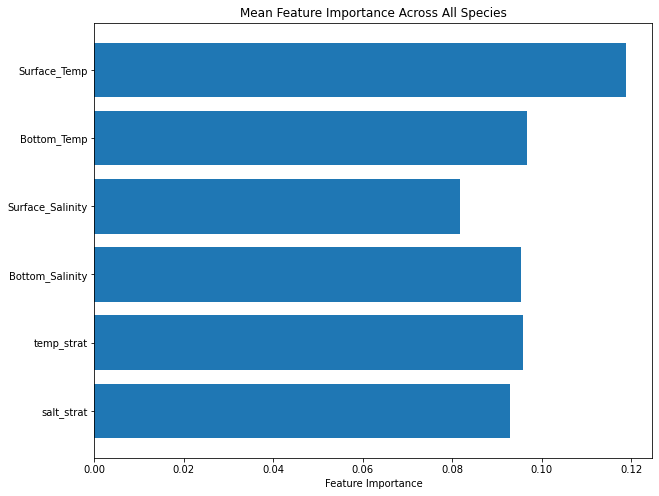

In [8]:
#Calculate feature importance
import matplotlib.pyplot as plt 

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

# Calculate mean feature importance across all species
feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()


### Rare species model

Defining rare species calculation as any species which showed up in <20% of stations

In [14]:
threshold = len(ml_df) * 0.1

# Count the non-zero occurrences of each species
species_columns = ml_df.columns[:-10]  # Adjust the slice to exclude non-species columns if needed
species_counts = (ml_df[species_columns] > 0).sum()
filtered_species = species_counts[species_counts >= threshold].index
filtered_df = ml_df[filtered_species]
non_species_columns = df.columns[-10:]  # Adjust this if the non-species columns are at the end
filtered_df = pd.concat([filtered_df, df[non_species_columns]], axis=1)
filtered_df = filtered_df.dropna()
filtered_df

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),Summ_flounder,Summ_flounder99a,...,Atl_herring,Longitude,Latitude,station,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
0,0.000000,0.021454,0.040537,0.000000,0.013350,0.000000,0.024768,0.006895,0.084811,0.000000,...,0.000000,-74.568,38.874,10.0,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436
1,0.000000,0.013388,0.009241,0.000000,0.028128,0.000000,0.054104,0.000000,0.009626,0.016942,...,0.000000,-74.618,38.724,11.0,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070
2,0.030301,0.011375,0.013220,0.026649,0.064406,0.020961,0.000000,0.006125,0.032469,0.000000,...,0.000000,-74.672,38.728,12.0,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090
3,0.002777,0.020035,0.002677,0.003510,0.000000,0.005064,0.015582,0.000000,0.011550,0.004231,...,0.027043,-74.928,38.905,13.0,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131
4,0.016257,0.040472,0.004415,0.000487,0.001678,0.000000,0.037753,0.000421,0.037759,0.024912,...,0.007909,-74.969,38.843,14.0,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880
5,0.007543,0.062495,0.007430,0.000438,0.000202,0.000000,0.039845,0.000000,0.047545,0.014423,...,0.007206,-75.003,38.798,15.0,5.568684,5.016651,25.406462,29.838333,0.552033,4.431871
6,0.009929,0.080704,0.000000,0.000000,0.000000,0.000000,0.055974,0.000000,0.054607,0.011997,...,0.009434,-74.806,38.780,16.0,5.839688,5.689212,29.992126,30.134362,0.150476,0.142236
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283856,0.000000,...,0.000000,-74.655,38.974,17.0,5.716317,5.635537,30.330456,30.343291,0.080780,0.012834
8,0.000000,0.039378,0.007681,0.000753,0.002215,0.002386,0.009768,0.000000,0.037155,0.007595,...,0.001967,-74.743,39.046,18.0,5.649796,5.595073,30.333868,30.335782,0.054723,0.001914
9,0.000000,0.044626,0.000000,0.006644,0.000000,0.000000,0.055586,0.000000,0.045920,0.000000,...,0.000000,-74.732,39.060,19.0,5.517048,5.507758,30.215509,30.215118,0.009290,0.000391


In [10]:
filtered_df.to_csv('feb_filtered.csv')

In [15]:
features = filtered_df[['Surface_Salinity','Bottom_Salinity','salt_strat', 'Surface_Temp','Bottom_Temp','temp_strat']]

# must update this line after updating threshold
labels = filtered_df.loc[:, 'Bay_anchovy':'Atl_herring'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
## DOES BETTER ON 30% test than 20! CTD model was better with 20

# Initialize and train the multi-output Random Forest classifier
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracies = []

for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(accuracy)

    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    # print(f"Accuracy for {species}: {accuracy}")

# Calculate overall average accuracy across all species
average_accuracy = np.mean(accuracies)
average_accuracy

# # Evaluate the model
# for i, species in enumerate(labels.columns):
#     print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))


Classification report for Bay_anchovy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.50      0.55         6

    accuracy                           0.38         8
   macro avg       0.30      0.25      0.27         8
weighted avg       0.45      0.38      0.41         8

Classification report for Black_drum_or_Spot:
               precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.50      0.20      0.29         5

    accuracy                           0.38         8
   macro avg       0.42      0.43      0.37         8
weighted avg       0.44      0.38      0.35         8

Classification report for Black_sea_bass:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.00      0.00      0.00         2

    accuracy                           0.25         

0.65234375

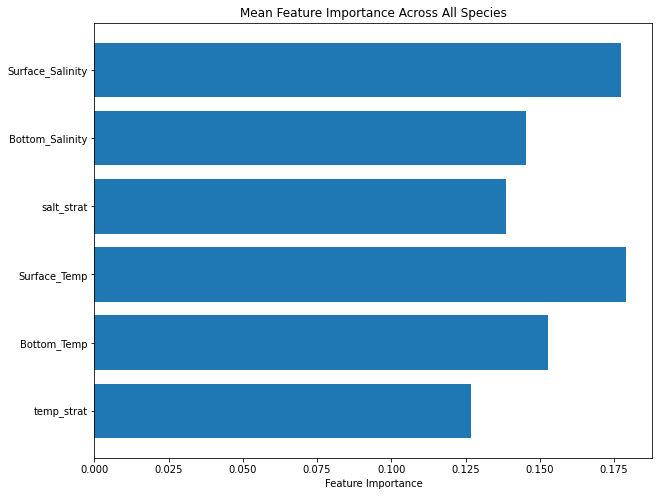

In [12]:

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

# Calculate mean feature importance across all species
feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()